### Problem Statement: To determine whether the credit card transaction done was fraudulent(1) or genuine(0).

<hr>

load the necessary modules from the file "***requirements.txt***"

In [ ]:
# !pip install -r requirements.txt

In [ ]:
# dataset source : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/discussion/373669

In [ ]:
# !pip install seaborn

In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# from ydata_profiling import ProfileReport # for auto EDA


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# !pip install ydata-profiling

Data loading and data visualizations

In [ ]:
# from google.colab import files

# uploaded = files.upload()


In [ ]:
credit_data = pd.read_csv("creditcard.csv")

In [ ]:
credit_data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
203546,134863.0,0.098863,0.886085,-0.009876,-0.767202,0.819906,-0.683358,1.030372,-0.188825,-0.071318,...,-0.304352,-0.667242,-0.030803,-0.708425,-0.371554,0.183199,0.249780,0.090856,2.68,0
148493,89956.0,-1.894230,1.403948,-0.925458,-0.477406,-0.248086,-1.284560,0.104692,0.724381,0.014764,...,-0.283961,-0.493728,0.594103,-0.015783,-0.322355,0.118196,-0.413492,-0.352654,16.00,0
136250,81613.0,-2.069429,1.938329,0.226337,-0.152869,-0.829807,-0.294793,-0.513590,1.493178,-0.839678,...,-0.082348,-0.416218,0.202043,0.001533,-0.101600,0.099062,0.137152,-0.000109,8.98,0
135121,81117.0,-2.879165,2.188203,-0.161322,-1.745676,-0.408055,-0.389246,0.005097,0.657315,0.902673,...,-0.174435,0.026624,0.105490,-0.278345,-0.130814,0.629173,-1.330474,-1.090862,2.15,0
37506,38986.0,-0.891381,0.154366,1.722335,0.227139,0.207031,-0.291426,1.153075,-0.070933,-0.125778,...,-0.115524,-0.618698,0.381472,-0.049800,-0.392174,-0.866031,-0.091686,-0.071520,142.90,0


In [ ]:
print(f' We have {credit_data.shape[0]} credit card transactions data in our dataset.')

 We have 284807 credit card transactions data in our dataset.


In [ ]:
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

V1 to V28 columns has been hidden on purpose due to various privacy reasons and also it is mentioned that V1 to V28 are the principle components obtained after PCA reduction

In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<p style="font-size: 17px; color: blue;">
 Features V1, V2, … V28 are the principal components obtained with PCA. The only features which have not been transformed with PCA are 'Time' and 'Amount'. </p>

- **Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.**
- **The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.**
- **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**



In [ ]:
credit_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<div style = "color:red;">
Observation:<br>
- class is categorical data with 2 categories: 0 and 1.<br>
- highly imbalanced dataset with 492 anomaly transactions.
</div>

In [ ]:
print(f'There are only {credit_data[credit_data.Class == 1].shape[0]} number of fraudulent transactions out of total {credit_data.shape[0]} total transactions.')

There are only 492 number of fraudulent transactions out of total 284807 total transactions.


In [ ]:
print(f'Fraud transaction happened only {round(credit_data[credit_data.Class == 1].shape[0]/credit_data.shape[0] * 100 , 3)} % of time.')

Fraud transaction happened only 0.173 % of time.


###Our data is highly imbalanced(as we can the skewness in the target classes) and if we try training any s**upervised algorithm** with this data, then it will most likely mark fraud transaction as geniuene.

**Let us understand about the imbalanaced data**
<p style="font-size: 28px; color: blue;">What is Imbalanced Data?</p>
<p>Imbalanced data refers to a situation in machine learning where one category or class of data (called the minority class) is much less common than another category (the majority class). This imbalance can be a problem because machine learning models may not work well when they are heavily biased towards the majority class.</p>

<p style="font-size: 18px; color: blue;">Techniques to Handle Imbalanced Data</p>
<p><strong>Resampling Techniques:</strong> These methods involve adjusting the number of examples in each class. Oversampling creates more copies of the minority class to balance the dataset, while undersampling reduces the number of majority class examples to balance the dataset.</p>

<p><strong>Cost-Sensitive Learning:</strong> This approach involves modifying the loss function of the model to give more weight to the minority class. It assigns a higher "cost" to mistakes in the minority class, making the model more sensitive to misclassifying examples from the minority class.</p>

<p><strong>Ensemble Methods:</strong> These methods are like teamwork for models. Instead of relying on one model, you use multiple models and combine their predictions. This can help effectively handle imbalanced data.</p>

<p><strong>Thresholding:</strong> You can change the decision threshold of your model. By making the threshold higher, you make your model more cautious, making it more likely to classify examples as the minority class. Lowering the threshold makes it more likely to classify examples as the majority class.</p>

<p><strong>Generative Adversarial Networks (GANs):</strong> GANs are used to create artificial new examples of the minority class. These artificial synthetic examples are generated by the GAN to balance out the dataset, making it more even.</p>


In [ ]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Checking if there is any NULL elements in the data

In [ ]:
credit_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
credit_data.duplicated().sum()

1081

<div style = "color:red;">
Observation:<br>
- no missing values<br>
- 1081 transactions have been duplicated( maybe same amount transaction done twice)
</div>

In [ ]:
credit_data.drop_duplicates(inplace = True)

#### Pandas Profiler - Auto EDA

In [ ]:
# report = ProfileReport(credit_data, title="Profiling Report")
# report.to_file('ProfileReport.html')

In [ ]:
# lets see the transactions count !

print(f' Minimum transaction amount: {credit_data.Amount.min()}')
print(f' Maximum transaction amount: {credit_data.Amount.max()}')


 Minimum transaction amount: 0.0
 Maximum transaction amount: 25691.16


In [ ]:
credit_data.Amount.describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

<div style = "color:red;">
Observation:<br>
- 0 rupees transaction of credit card means?
</div>

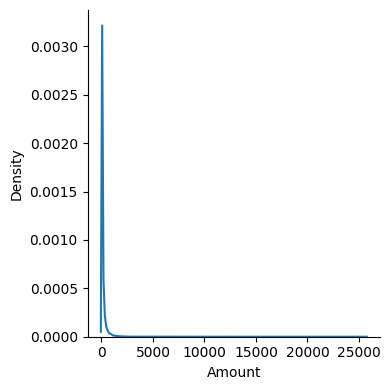

In [ ]:

sns.displot(data = credit_data, x = "Amount", kind = 'kde', height=4)


In [ ]:
fraud_df = credit_data[credit_data.Class == 1]
nonfraud_df = credit_data[credit_data.Class == 0]


fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Text(0.5, 0, 'Time')

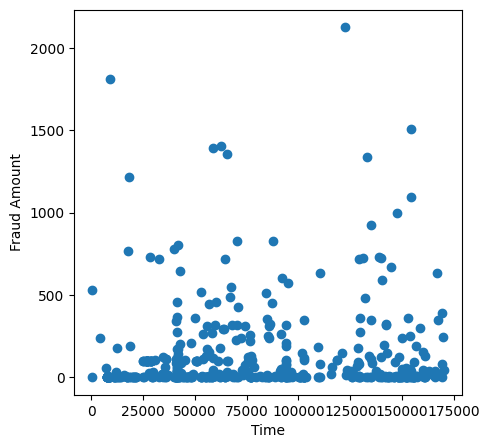

In [ ]:
plt.figure(figsize = (5,5))

plt.subplot(1,1,1)
plt.scatter(fraud_df.Time, fraud_df.Amount)
# plt.scatter(nonfraud_df.Time, nonfraud_df.Amount)

plt.ylabel('Fraud Amount')
plt.xlabel('Time')

<div style = 'color:red'>
most of the fraud amount is near 0 and less than 200  and only few of them are above 1500$.


Text(0.5, 0, 'Time')

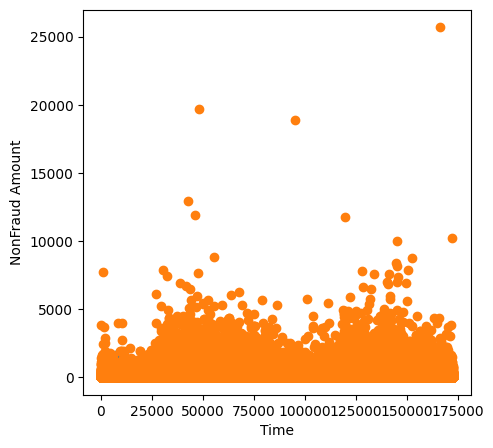

In [ ]:
plt.figure(figsize = (5,5))

plt.subplot(1,1,1)
# plt.scatter(fraud_df.Time, fraud_df.Amount)
plt.scatter(nonfraud_df.Time, nonfraud_df.Amount)

plt.ylabel('NonFraud Amount')
plt.xlabel('Time')

In [ ]:
print(f' There are {fraud_df[fraud_df.Amount == 0].shape[0]}  number of frauds with amount 0.00 $ out of {fraud_df.shape[0]} frauds.')

 There are 25  number of frauds with amount 0.00 $ out of 473 frauds.


In [ ]:
print(f' There are only {fraud_df[fraud_df.Amount >= 1000 ].shape[0]}  number of frauds with amount greater than equal to 1000$, out of {fraud_df.shape[0]} frauds.')

 There are only 9  number of frauds with amount greater than equal to 1000$, out of 473 frauds.


In [ ]:
print(f' Maximum fraud amount: {fraud_df.Amount.max()}')

 Maximum fraud amount: 2125.87


<Axes: >

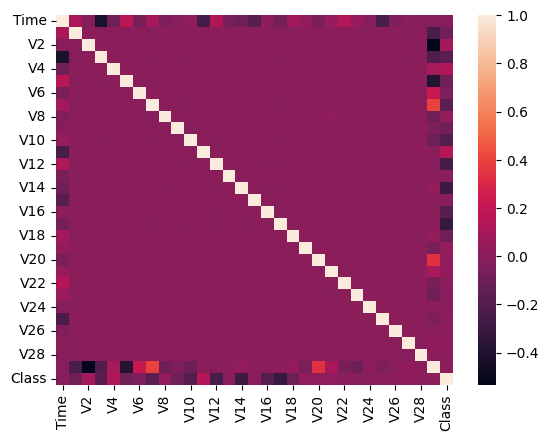

In [ ]:
sns.heatmap(credit_data.corr())

no features are much corelated with each other. maybe they are but we cant see them cause of imbalanced dataset.



# scaling and splitting

#### scaling the remaining columns time and amount using robust scaler cause robust scalar handles outliers pretty well.


<img src = 'https://media.geeksforgeeks.org/wp-content/uploads/20230428205714/for4.png'>

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

credit_data['scaled_amount'] = robust_scaler.fit_transform(credit_data.Amount.values.reshape(-1,1))
credit_data['scaled_time'] = robust_scaler.fit_transform(credit_data.Time.values.reshape(-1,1))
credit_data.drop(['Time','Amount'], axis = 1 , inplace = True)

In [ ]:
print('Final Scaled data looks like:')
credit_data.head()

Final Scaled data looks like:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


<p style="font-size: 18px; color: blue;">
We need to create a sub-sample of our actual dataframe i.e undersampling </p>

**1) It would reduce the overfitting error where most of the data are being predicted as geniuene due to imbalanced dataset.** <br>

**2) It would allow us to see the actual correlation between various features , which we are not able to see right now due to the imbalance in dataset.**



In [ ]:
from sklearn.utils import shuffle
credit_data = shuffle(credit_data)

In [ ]:
fraud_df = credit_data[credit_data.Class == 1]
geniuene_df = credit_data[credit_data.Class == 0]

In [ ]:
fraud_df.shape

(473, 31)

In [ ]:
geniuene_df = geniuene_df[0:fraud_df.shape[0]]

In [ ]:
geniuene_df.shape

(473, 31)

In [ ]:
new_df = pd.concat([fraud_df, geniuene_df])
new_df = shuffle(new_df)

In [ ]:
new_df.isna().sum().max()

0

In [ ]:
new_df.shape


(946, 31)

In [ ]:
new_df.Class.value_counts()
# equally distributed

0    473
1    473
Name: Class, dtype: int64

Text(0.5, 1.0, 'Equally distributed new dataframe')

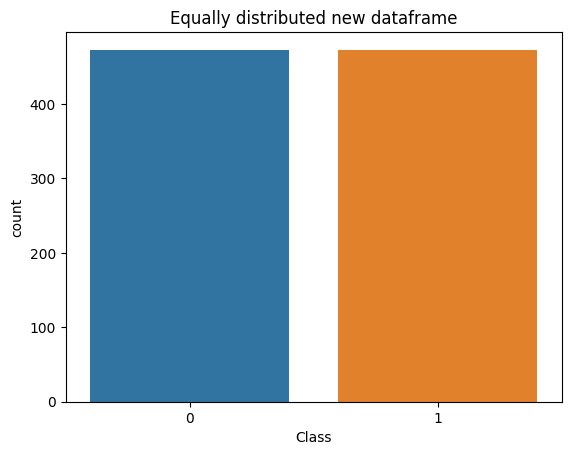

In [ ]:
sns.countplot(data = new_df, x= 'Class')
plt.title('Equally distributed new dataframe')

 lets work with this new df

After undersampling and scaling


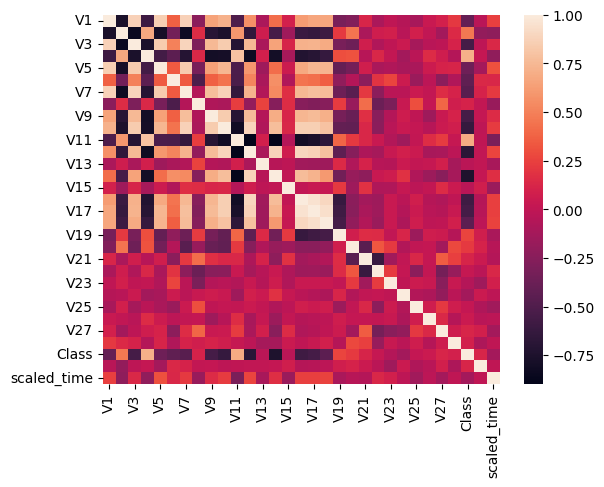

In [ ]:
sns.heatmap(new_df.corr())
print("After undersampling and scaling")

<Axes: >

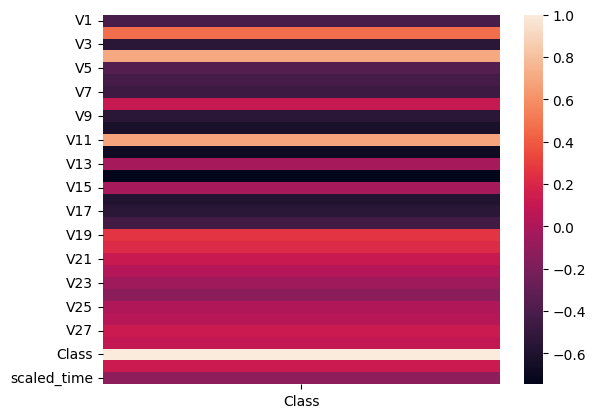

In [ ]:
sns.heatmap(new_df.corr()[['Class']])

In [ ]:
correlation_with_class = new_df.corr()['Class']
sorted_correlation = correlation_with_class.sort_values(ascending = False)

sorted_correlation

Class            1.000000
V4               0.706228
V11              0.681638
V2               0.465487
V19              0.258854
V20              0.218671
scaled_amount    0.121391
V27              0.121009
V21              0.116428
V8               0.107446
V28              0.087790
V26              0.043751
V22              0.027330
V25              0.014124
V13             -0.026719
V15             -0.028423
V23             -0.055409
scaled_time     -0.123344
V24             -0.134868
V5              -0.361501
V1              -0.406522
V6              -0.432162
V18             -0.444674
V7              -0.463553
V17             -0.551211
V9              -0.552040
V3              -0.554235
V16             -0.582524
V10             -0.626384
V12             -0.680719
V14             -0.746199
Name: Class, dtype: float64

<div style = "color:red;">
V4, V11, V2, V19 having positive correlation with class.
V16, V10, V12, V14 having negative correlation with class.

In [ ]:
# train test split
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
120505,-4.793667,3.418911,-5.074445,4.035987,-3.527875,-1.923242,-5.065981,1.996885,-3.097379,-6.447202,...,1.168618,0.289531,-0.371888,0.144761,0.084735,-0.197431,0.328672,0.835395,1.082603,-0.103904
268375,-5.238808,0.623013,-5.784507,1.678889,-0.364432,-0.477295,-4.276132,-0.695173,-2.971644,-5.529131,...,-0.326140,1.509239,-0.215966,-0.245727,0.893041,0.865758,0.854657,-0.964482,0.250035,0.922382
92777,-6.133987,2.941499,-5.593986,3.258845,-5.315512,-0.637328,-4.476488,1.695994,-1.606743,-5.117259,...,0.868340,0.793736,0.217347,-0.021985,0.145882,0.665088,-1.684186,0.310195,3.795022,-0.242081
10497,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,-0.554224,...,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,-0.253233,-0.792924
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,7.050480,-0.989744


In [ ]:
X_train.shape

(756, 30)

In [ ]:
X_test.shape

(190, 30)

Now that we have successfully re-sampled the data, we can apply supervised learning algotithms. We will be applying binary classifier algorithms. The perfomance metrics of the algorithms used will be printed alongside

### Supervised - Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_predict

Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth = 1)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 91.14 %
Model Accuracy Score : 94.21 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       110
           1       1.00      0.86      0.93        80

    accuracy                           0.94       190
   macro avg       0.95      0.93      0.94       190
weighted avg       0.95      0.94      0.94       190

--------------------------------------------------------


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.92105263 0.90728477 0.9205298  0.90728477 0.90728477]
Average Accuracy: 0.9126873475078424


SVM

In [ ]:
svm = SVC( )
model3=svm.fit(X_train,y_train)
y_pred3=model3.predict(X_test)


# print(f'classification report :{classification_report(y_test,y_pred3)}')
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred3))
print("\033[1m--------------------------------------------------------\033[0m")
print('*************************************')
print(f'confusion matrix :{confusion_matrix(y_test,y_pred3)}')
print('*************************************')
print(f'accuracy score :{accuracy_score(y_test,y_pred3)}')

--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       110
           1       0.97      0.89      0.93        80

    accuracy                           0.94       190
   macro avg       0.95      0.93      0.94       190
weighted avg       0.94      0.94      0.94       190

--------------------------------------------------------
*************************************
confusion matrix :[[108   2]
 [  9  71]]
*************************************
accuracy score :0.9421052631578948


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", round(cv_scores.mean(),2))

Cross-Validation Scores: [0.92763158 0.91390728 0.95364238 0.92715232 0.9205298 ]
Average Accuracy: 0.93


Logistic Regression

In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       110
           1       1.00      0.90      0.95        80

    accuracy                           0.96       190
   macro avg       0.97      0.95      0.96       190
weighted avg       0.96      0.96      0.96       190

--------------------------------------------------------
Accuracy: 0.9578947368421052


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.94078947 0.92715232 0.93377483 0.94701987 0.94701987]
Average Accuracy: 0.9391512722202858


On observation, it turns out the average accuracy of all the three models used are nearly equal to 92%. However the F1 score of the SV model is the greatest among others.

This concludes our Notebook.